In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np


In [ ]:
csv_file_path = 'C:/Users/Public/Documents/TELECHARGEMENT/BdeB/A55-Analyse exploratoire/TD2/diabetes.csv'
data = pd.read_csv(csv_file_path)
data.head()
print('----------------------------------------------------------------')
print(data.columns)
print('----------------------------------------------------------------')

data.info()
print('----------------------------------------------------------------')

data.describe()
print('----------------------------------------------------------------')
dispaly(data.isnull().sum())
print('----------------------------------------------------------------')
# Visualisation des données
#plt.figure(figsize=(10, 6))
#sns.histplot(data['Age'], bins=30, kde=True)

----------------------------------------------------------------
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  


In [13]:
grouped_outcome = data.groupby('Outcome').mean()
display(grouped_outcome)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
grouped_outcome.sort_values(by='Glucose', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


In [15]:
# afficher les valeurs nulles
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
#remplacer les valeurs nulles par la moyenne de la colonne
data.fillna(data.mean(), inplace=True)

In [17]:
#supprimer les lignes avec des valeurs nulles
data.dropna(inplace=True)

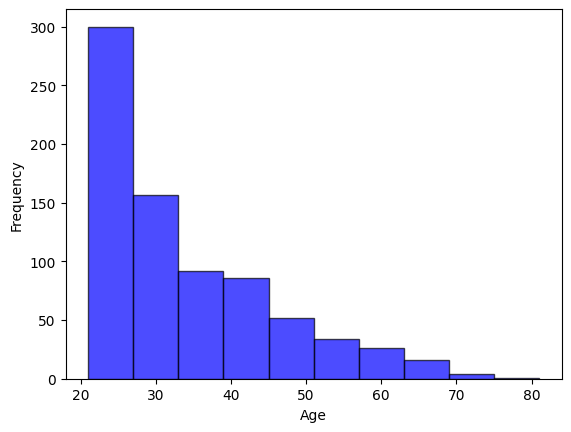

In [33]:
#créer un histogramme pour la variable Age
plt.hist(data['Age'],bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')    
#plt.tight_layout()
plt.show()

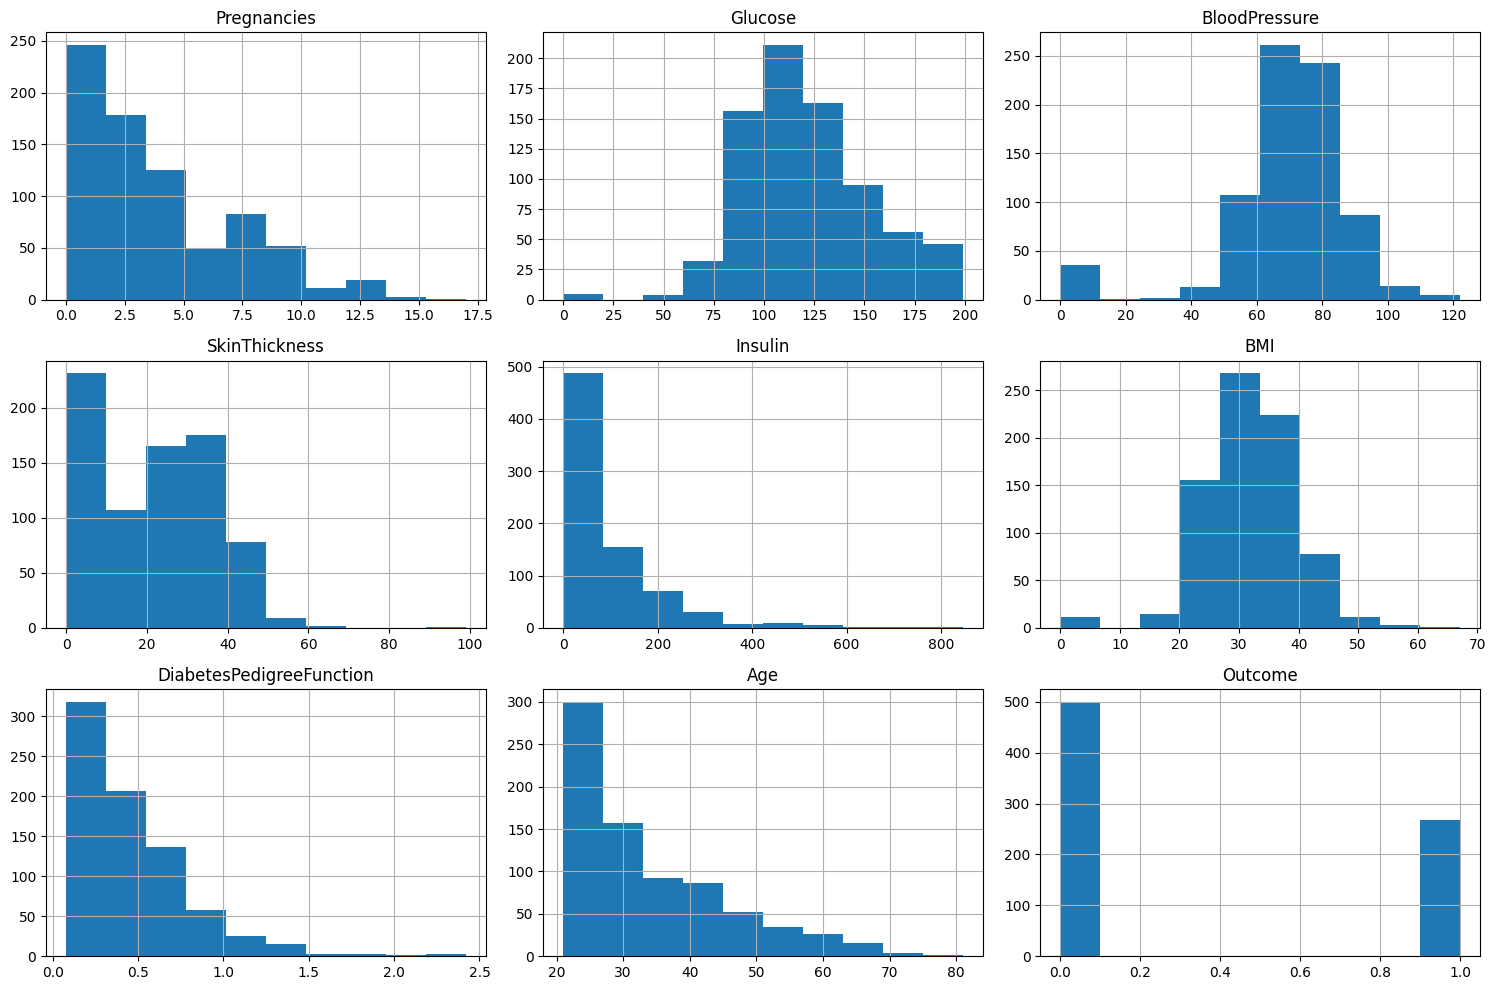

In [34]:
#créer un histogramme pour chaque variable numérique
data.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()


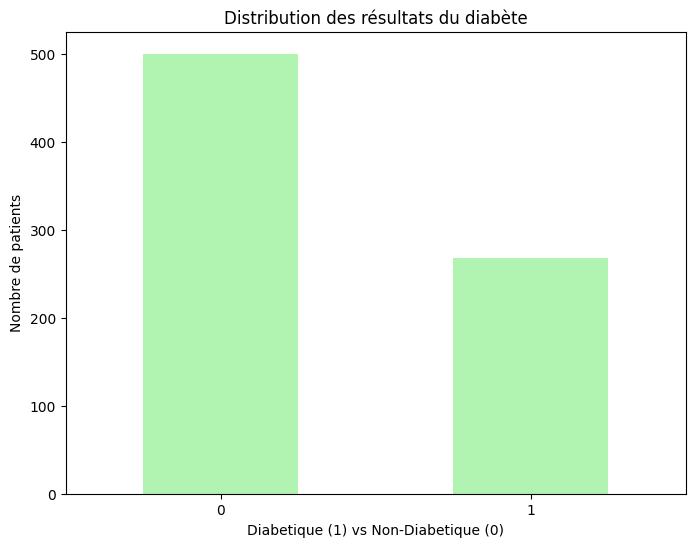

In [37]:
data['Outcome'].value_counts().plot(kind='bar',color='lightgreen', figsize=(8, 6), alpha=0.7, rot=0, title='Distribution des résultats du diabète')
plt.title('Distribution des résultats du diabète')
plt.xlabel('Diabetique (1) vs Non-Diabetique (0)')
plt.ylabel('Nombre de patients')
plt.show()


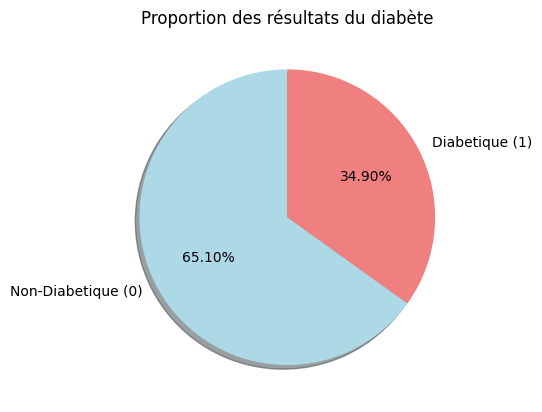

In [48]:
#pie chart
#data['Outcome'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'], figsize=(4, 4), title='Proportion des résultats du diabète')
labels = ['Non-Diabetique (0)', 'Diabetique (1)']
sizes = data['Outcome'].value_counts()
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, shadow=True)
plt.title('Proportion des résultats du diabète')
plt.show()

Text(0, 0.5, 'Value')

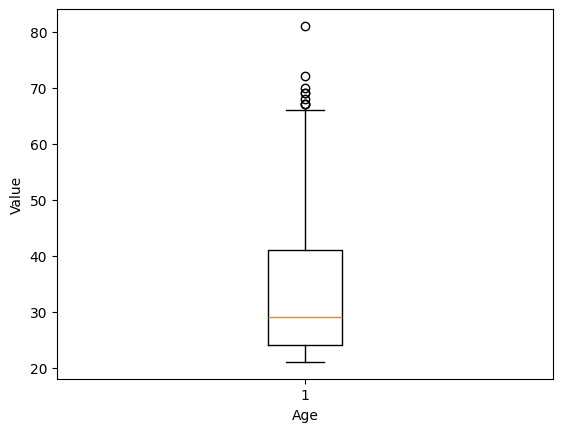

In [50]:
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Value')

C:\Users\bouma12\AppData\Local\Temp\ipykernel_28224\1219038185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette='Set2')


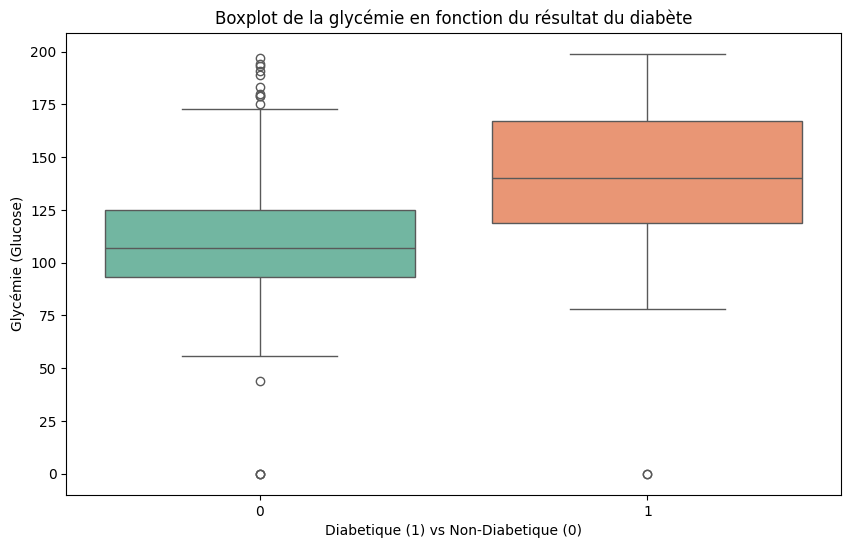

In [49]:
#boxplot
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='Set2')
plt.title('Boxplot de la glycémie en fonction du résultat du diabète')
plt.xlabel('Diabetique (1) vs Non-Diabetique (0)')
plt.ylabel('Glycémie (Glucose)')
plt.show()


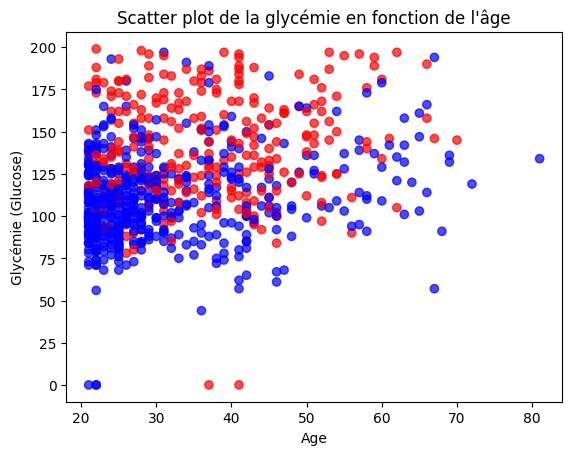

In [54]:
#scatter plot
#sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data, palette='Set1')
plt.scatter(data['Age'], data['Glucose'], c=data['Outcome'], cmap='bwr', alpha=0.7)
plt.title('Scatter plot de la glycémie en fonction de l\'âge')
plt.xlabel('Age')
plt.ylabel('Glycémie (Glucose)')
plt.show()